In [7]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [3]:
a_c_map = pd.read_excel('Bansard-airlines-codes-IATA-ICAO.xlsx')

In [4]:
def add_country(flight_i):
    first_3 = list(flight_i['callsign'].str[:3])
    
    countries = []
    airlines = []
    icao = list(a_c_map['ICAO Designator'])
    a_c_country = list(a_c_map['Country'])
    airline_names = list(a_c_map['Airline Name'])
    for i in range(len(first_3)):
        if first_3[i] in icao:
            found_idx = icao.index(first_3[i])
            countries.append(a_c_country[found_idx])
            airlines.append(airline_names[found_idx])
        else:
            countries.append(0)
            airlines.append(0)
            
    print('Appending Country and Airline Name')
    
    flight_i['country'] = countries
    flight_i['airline'] = airlines
#     flight_i = flight_i[['callsign', 'airline', 'country','number', 'icao24', 'registration', 'typecode', 
#                      'origin', 'destination', 'firstseen', 'lastseen', 'day', 'latitude_1',
#                      'longitude_1', 'altitude_1', 'latitude_2', 'longitude_2', 'altitude_2']]
    
    return flight_i

def get_us_data(flight):
    print('Grouping flights by Country')
    country_flights_test = flight.groupby(by = "country").count()['callsign'][1:].to_frame()
    country_flights_test.reset_index(level = 0, inplace=True)
    us_data = int(country_flights_test[country_flights_test['country'] == 'United States']['callsign'])
    
    return us_data
   
    

In [5]:
%%time
directory = './FlightData'
 
# iterate over files in
# that directory
us_data = []
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    print('Processing file:', f)
    # checking if it is a file
    flight_data = pd.read_csv(f)
    proc_f = add_country(flight_data)
    us_entry = get_us_data(proc_f)
    us_data.append(us_entry)
    

Processing file: ./FlightData\flightlist_20200101_20200131.csv
Appending Country and Airline Name
Grouping flights by Country
Processing file: ./FlightData\flightlist_20200401_20200430.csv
Appending Country and Airline Name
Grouping flights by Country
Processing file: ./FlightData\flightlist_20200701_20200731.csv
Appending Country and Airline Name
Grouping flights by Country
Processing file: ./FlightData\flightlist_20201001_20201031.csv
Appending Country and Airline Name
Grouping flights by Country
Processing file: ./FlightData\flightlist_20210101_20210131.csv
Appending Country and Airline Name
Grouping flights by Country
Processing file: ./FlightData\flightlist_20210401_20210430.csv
Appending Country and Airline Name
Grouping flights by Country
Processing file: ./FlightData\flightlist_20210701_20210731.csv
Appending Country and Airline Name
Grouping flights by Country
Processing file: ./FlightData\flightlist_20211001_20211031.csv
Appending Country and Airline Name
Grouping flights by 

In [6]:
us_data

[321710, 104785, 165395, 187398, 196491, 239813, 297720, 300136, 317333]

In [19]:
time_q = ['Q1 2020', 'Q2 2020', 'Q3 2020', 'Q4 2020', 'Q1 2021', 'Q2 2021', 'Q3 2021', 'Q4 2021', 'Dec 2021']

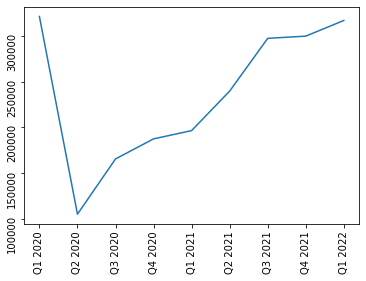

In [14]:
plt.plot(time_q, us_data)
plt.tick_params(labelrotation = 90)

In [15]:
covid = pd.read_csv('JH_time_series_covid19_confirmed_global.csv').fillna(0)

In [17]:
# Covid data preproc
month_start = ['1/22/20', '4/1/20', '7/1/20', '10/1/20', '1/1/21', '4/1/21', '7/1/21', '10/1/21', '12/1/21']
month_end = ['1/31/20', '4/30/20', '7/31/20', '10/31/20', '1/31/21', '4/30/21', '7/31/21', '10/31/21', '12/31/21']
covid_case_totals = []
for i in range(len(month_start)):
    covid_case_totals.append(int(covid.loc[:, month_end[i]][covid['Country/Region'] == 'US'] - covid.loc[:, month_start[i]][covid['Country/Region'] == 'US']))
    
covid_case_totals

[7, 851858, 1850626, 1871683, 5980006, 1811699, 1303483, 2356326, 6070210]

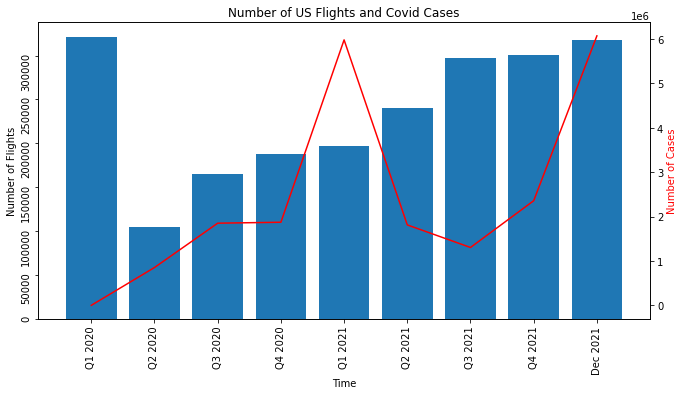

In [20]:
fig, ax = plt.subplots(figsize = (10, 5))
ax2 = ax.twinx()
ax.bar(time_q, us_data)
ax2.plot(time_q, covid_case_totals, color = 'r')
#plt.bar(country_flights['country'], country_flights['callsign'])
#country_flights['cases'].plot(secondary_y=True)
ax.set_xlabel('Time')
ax.set_ylabel('Number of Flights')
ax2.set_ylabel('Number of Cases', color = 'r')
 
# defining display layout
plt.tight_layout()

#plt.xlabel('Country')
#plt.ylabel('Number of Flights')
plt.title('Number of US Flights and Covid Cases')
ax.tick_params(labelrotation = 90)
plt.show()